<a href="https://colab.research.google.com/github/NayeemHossenJim/Deep-Learning/blob/main/Skin_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Sep 18 19:41:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.6 MB/s eta 0:00:00


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cP7tUqdCSWZ8OCQmvqls")
project = rf.workspace("objectdetection-qjbhq").project("skin-cancer-hxcjc")
version = project.version(1)
dataset = version.download("yolov12")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 115.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Skin-Cancer-1 in yolov12:: 100%|██████████| 4814/4814 [00:00<00:00, 7757.94it/s]


In [6]:
dataset.location

'/content/Skin-Cancer-1'

In [9]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo12n.pt" epochs=50 imgsz=640

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Skin-Cancer-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

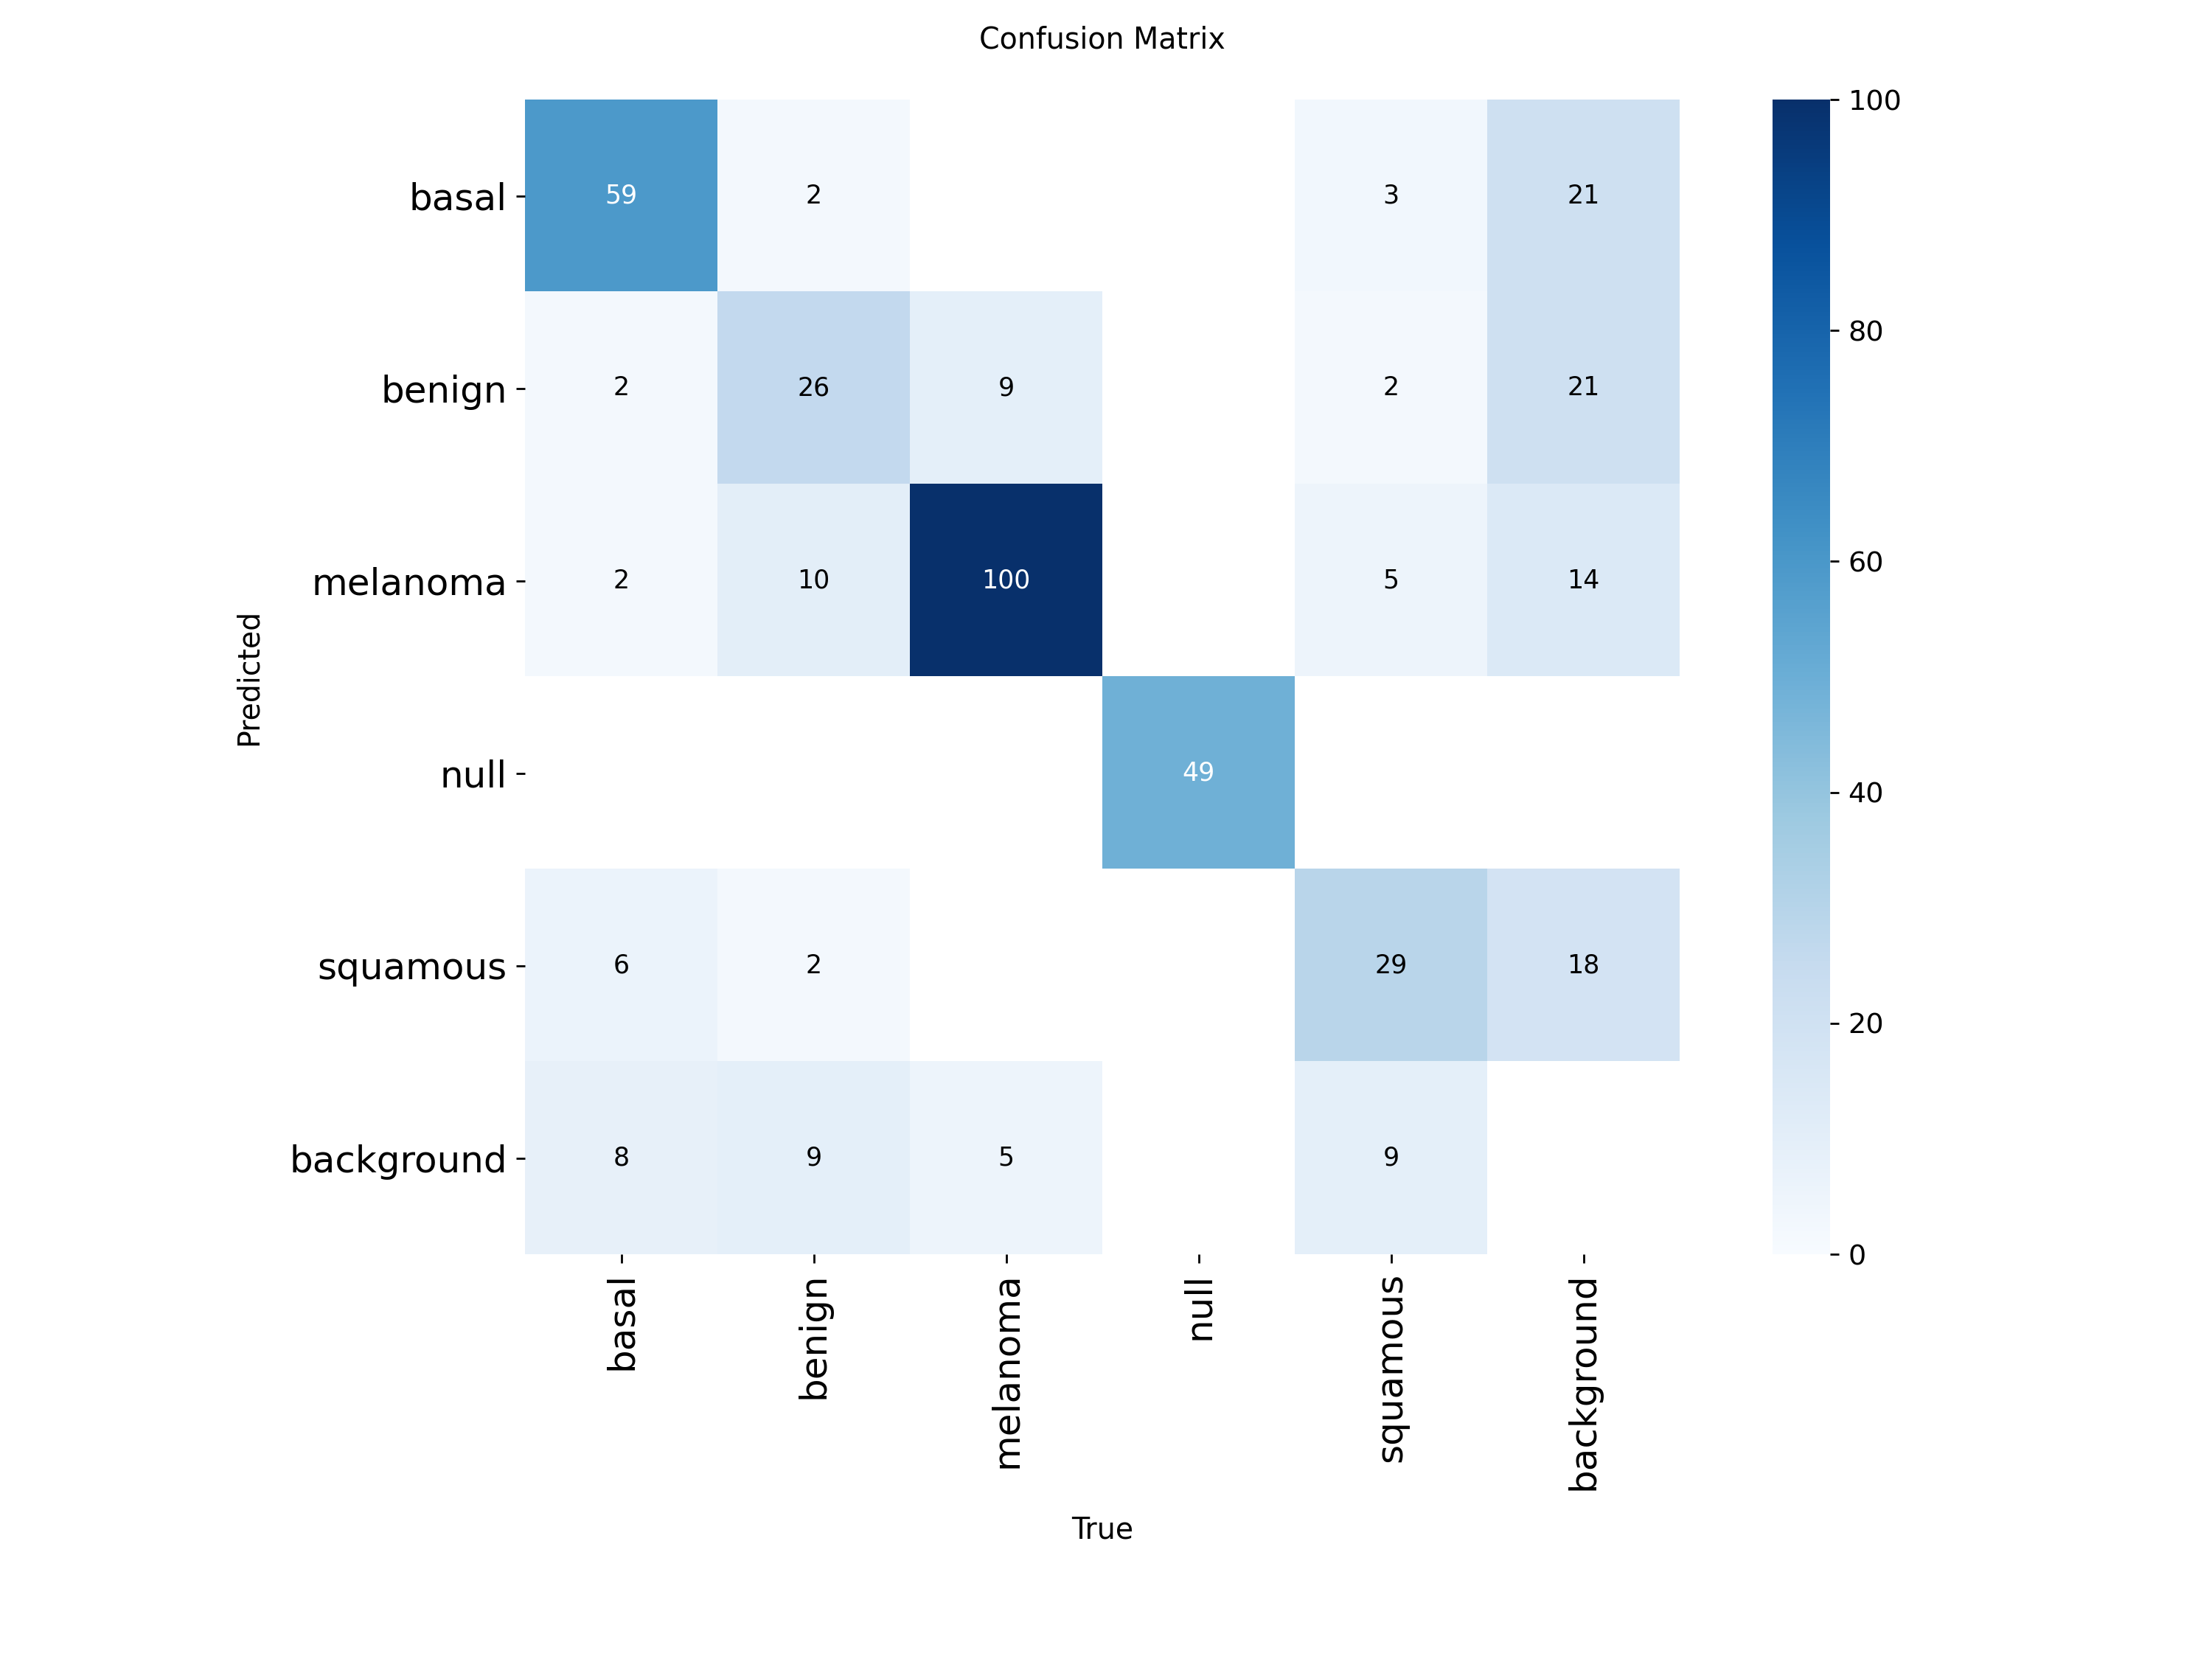

In [10]:
Image("/content/runs/detect/train2/confusion_matrix.png", width=600)

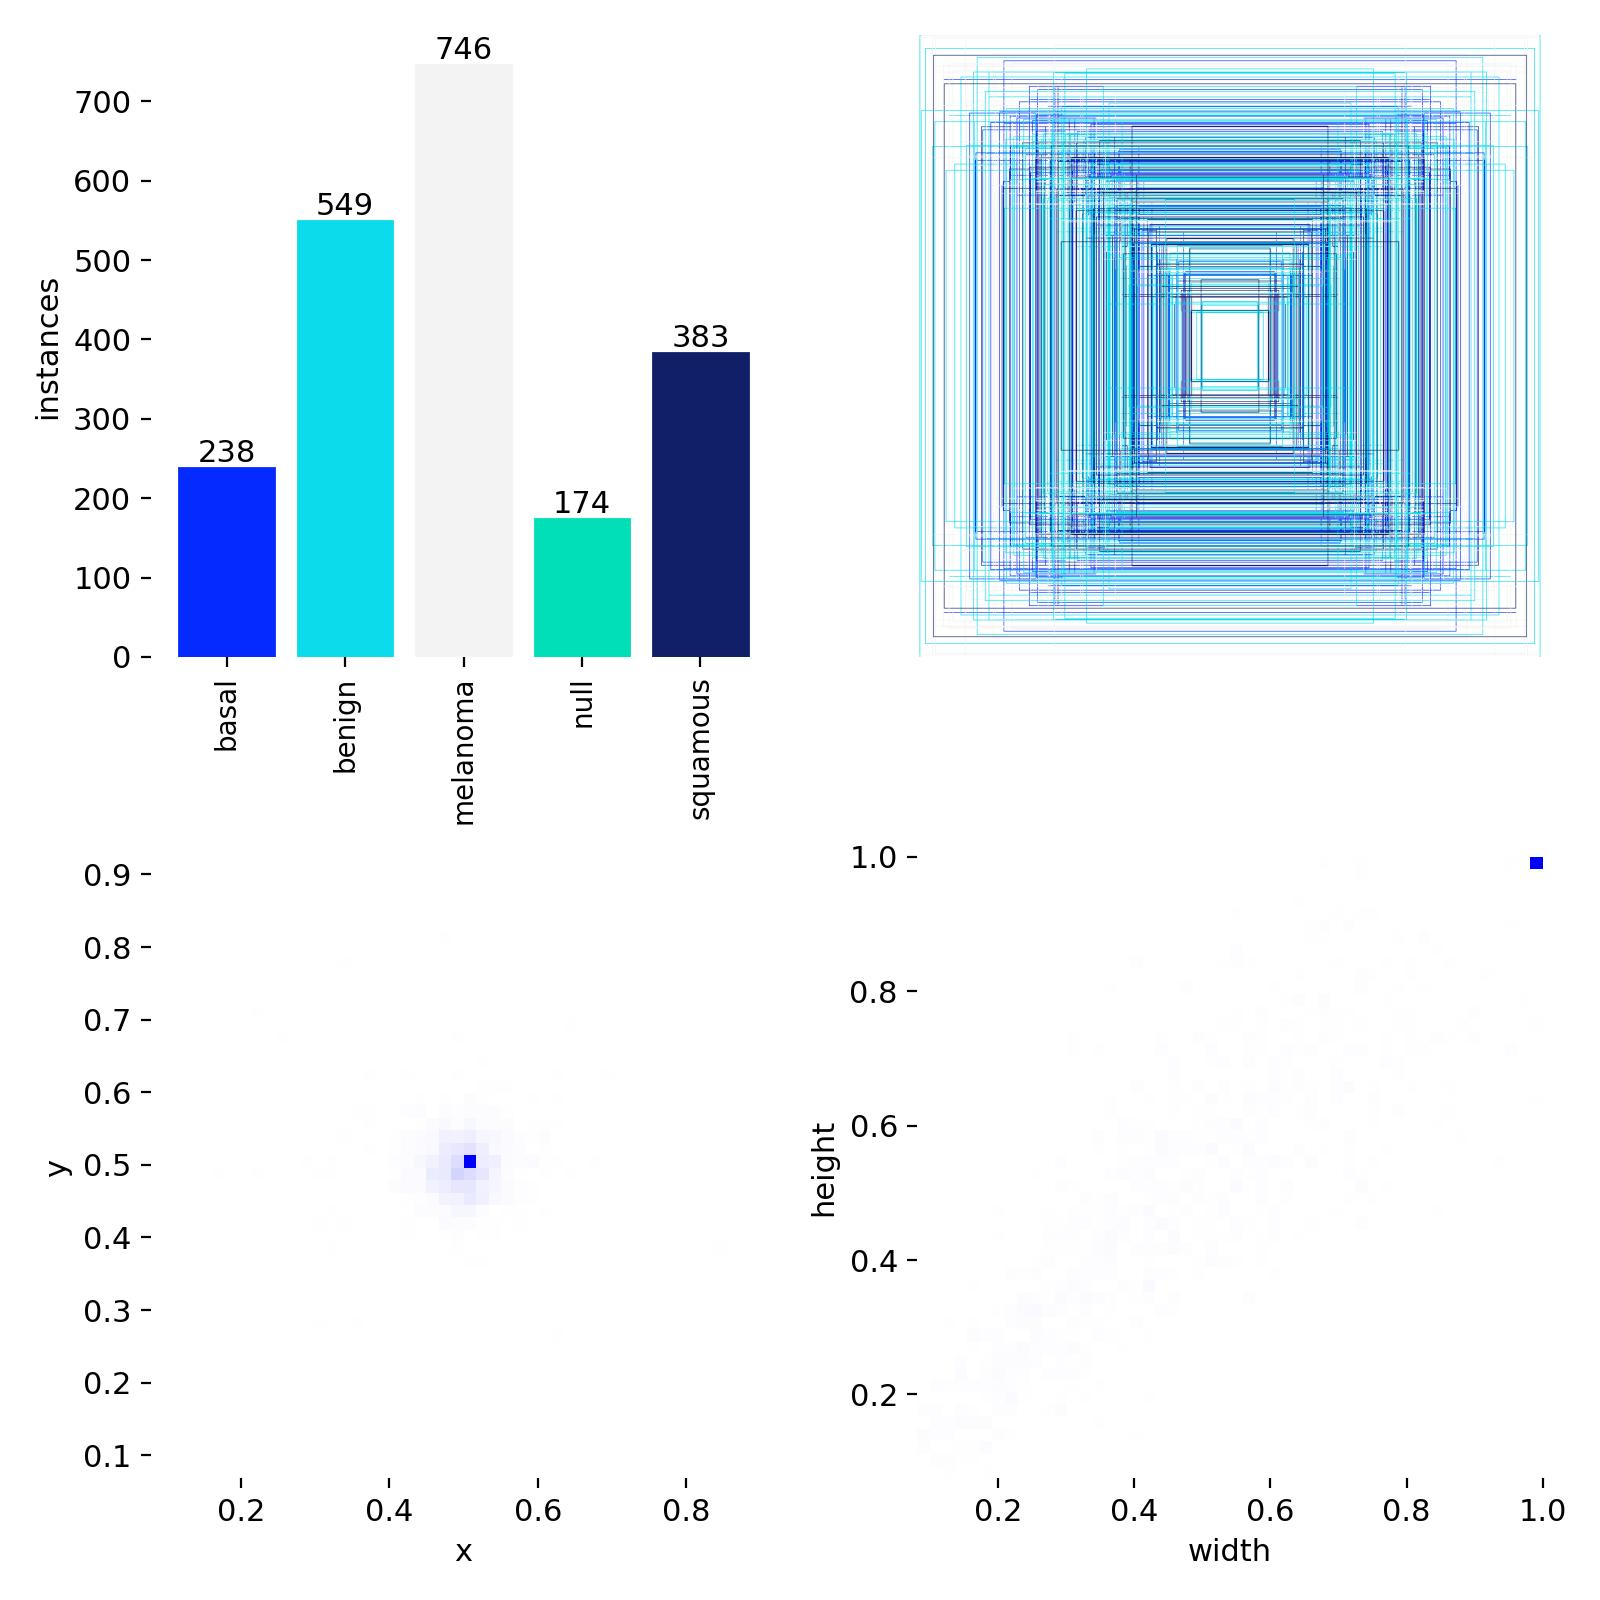

In [11]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

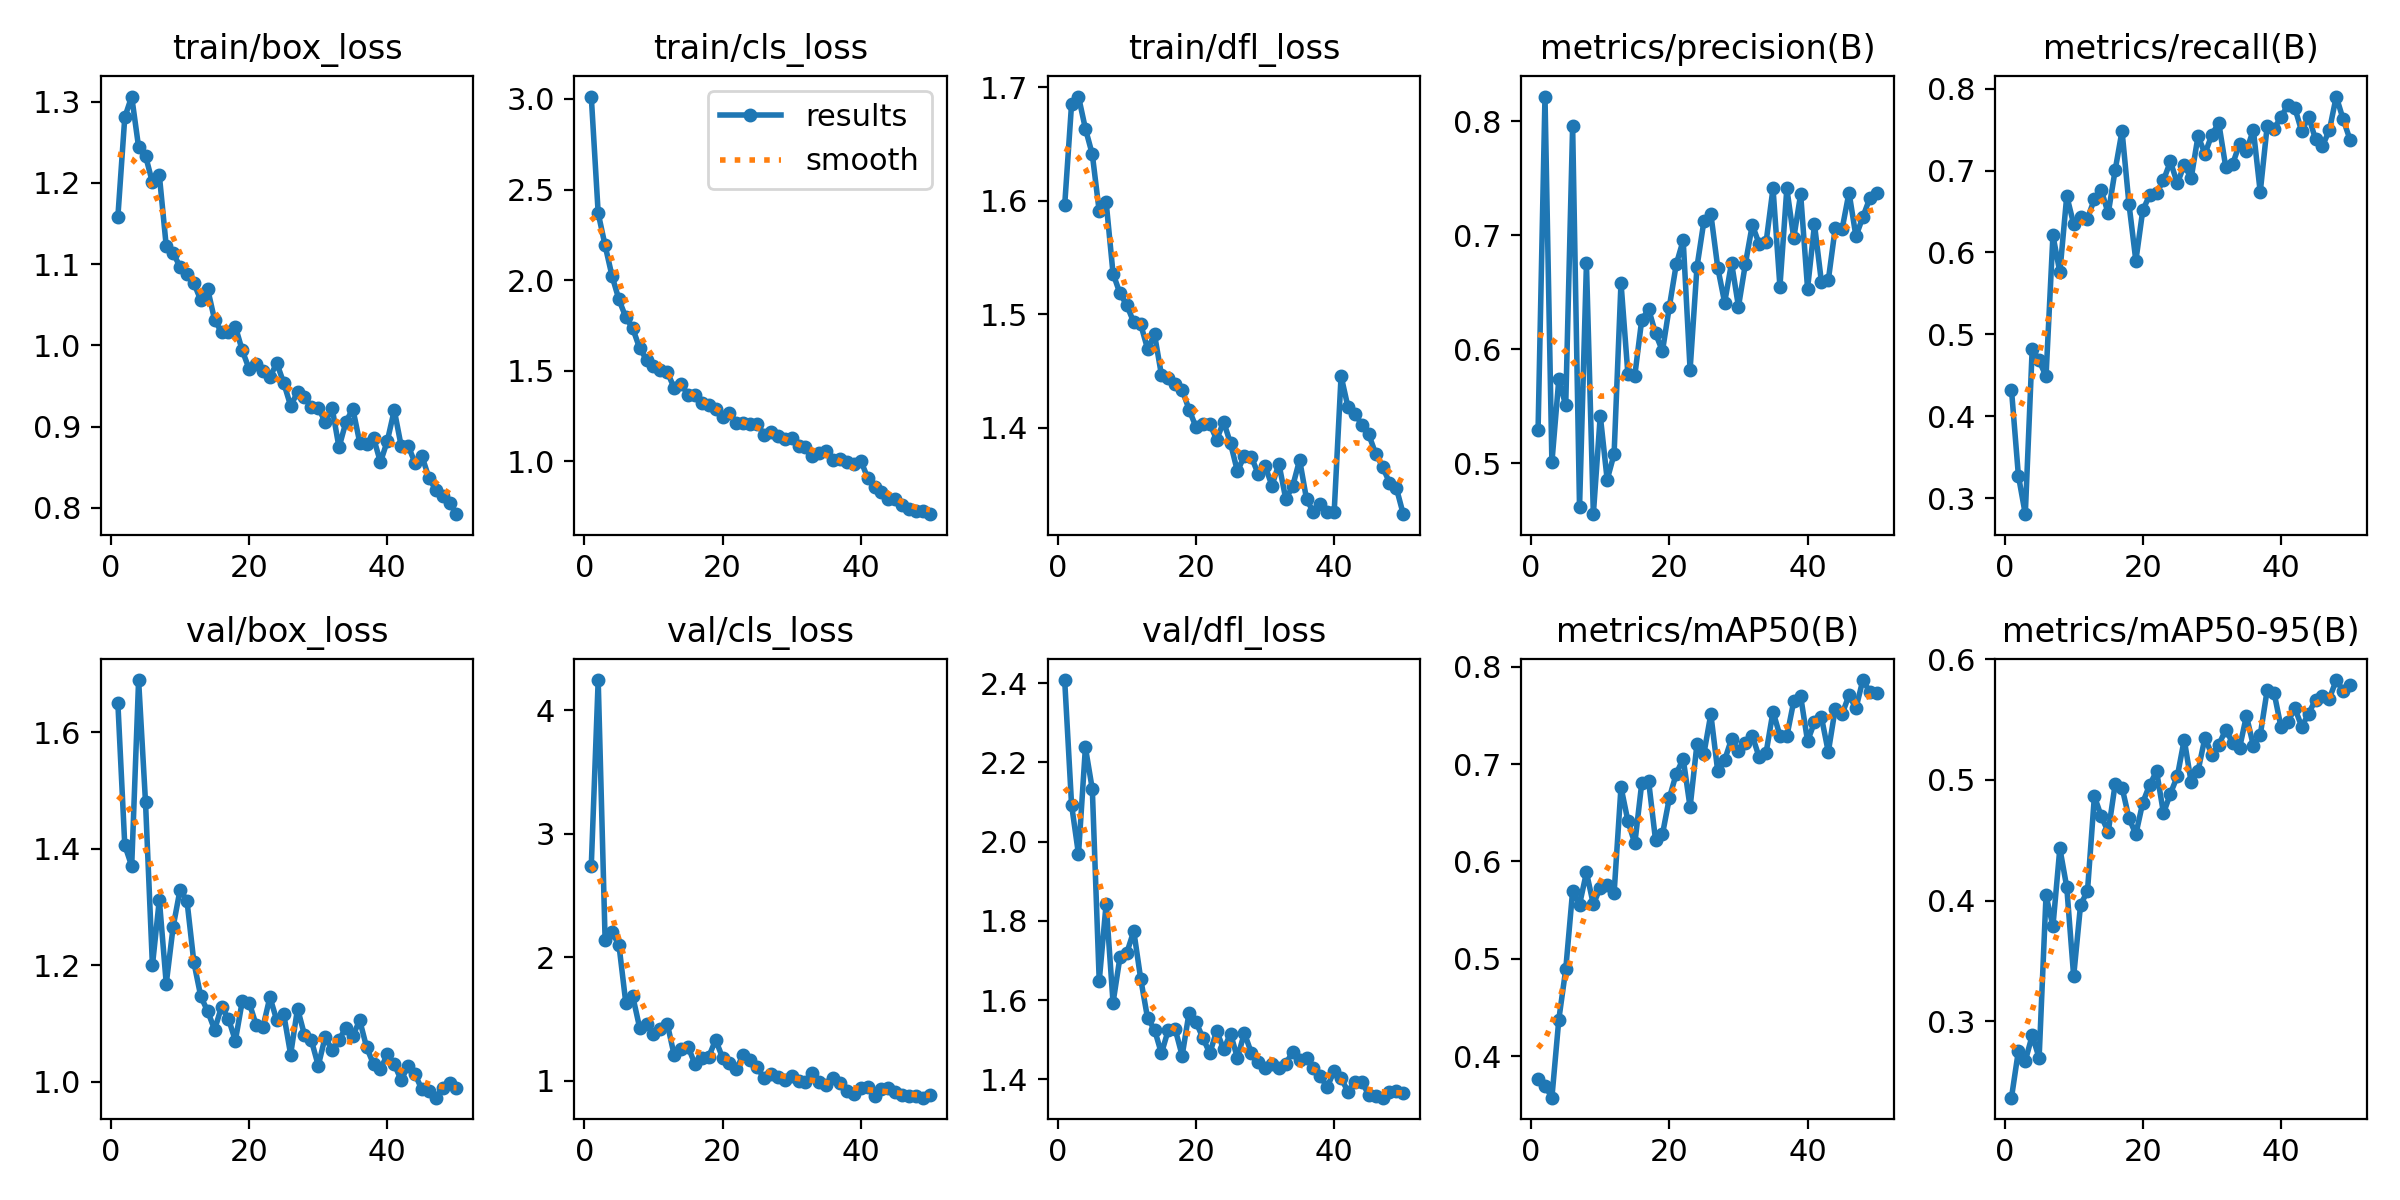

In [12]:
Image("/content/runs/detect/train2/results.png", width=600)

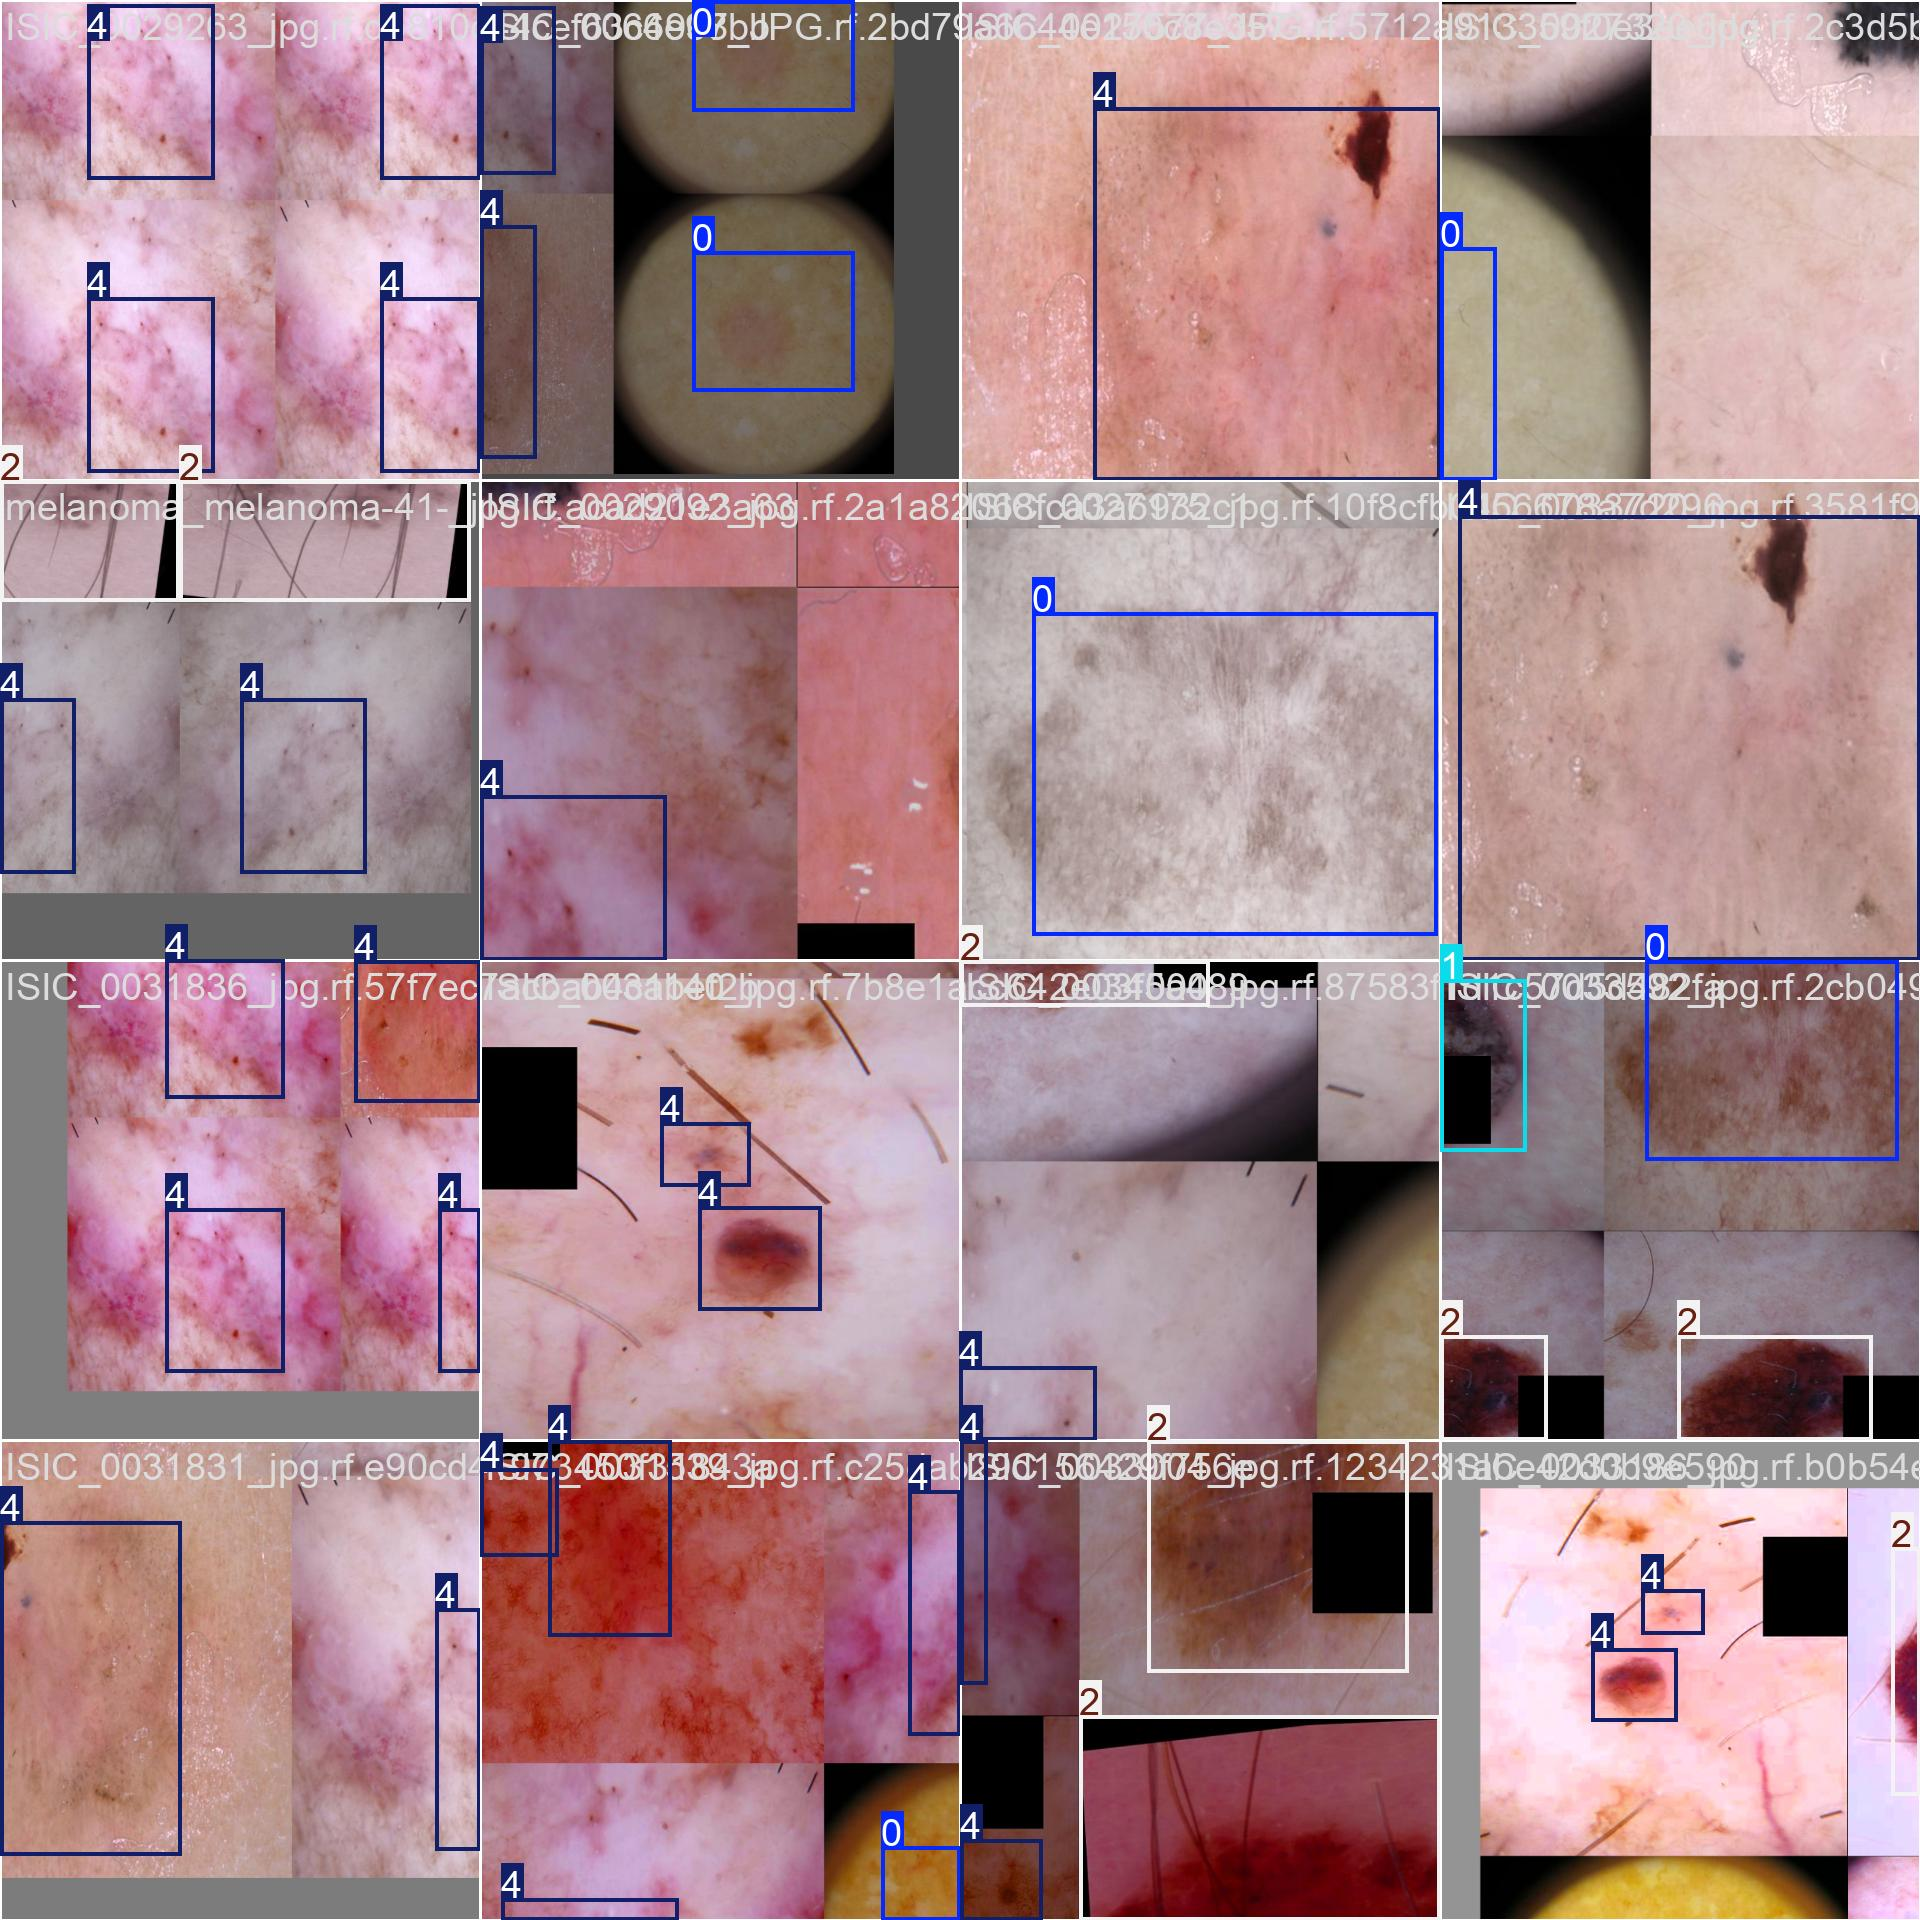

In [13]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

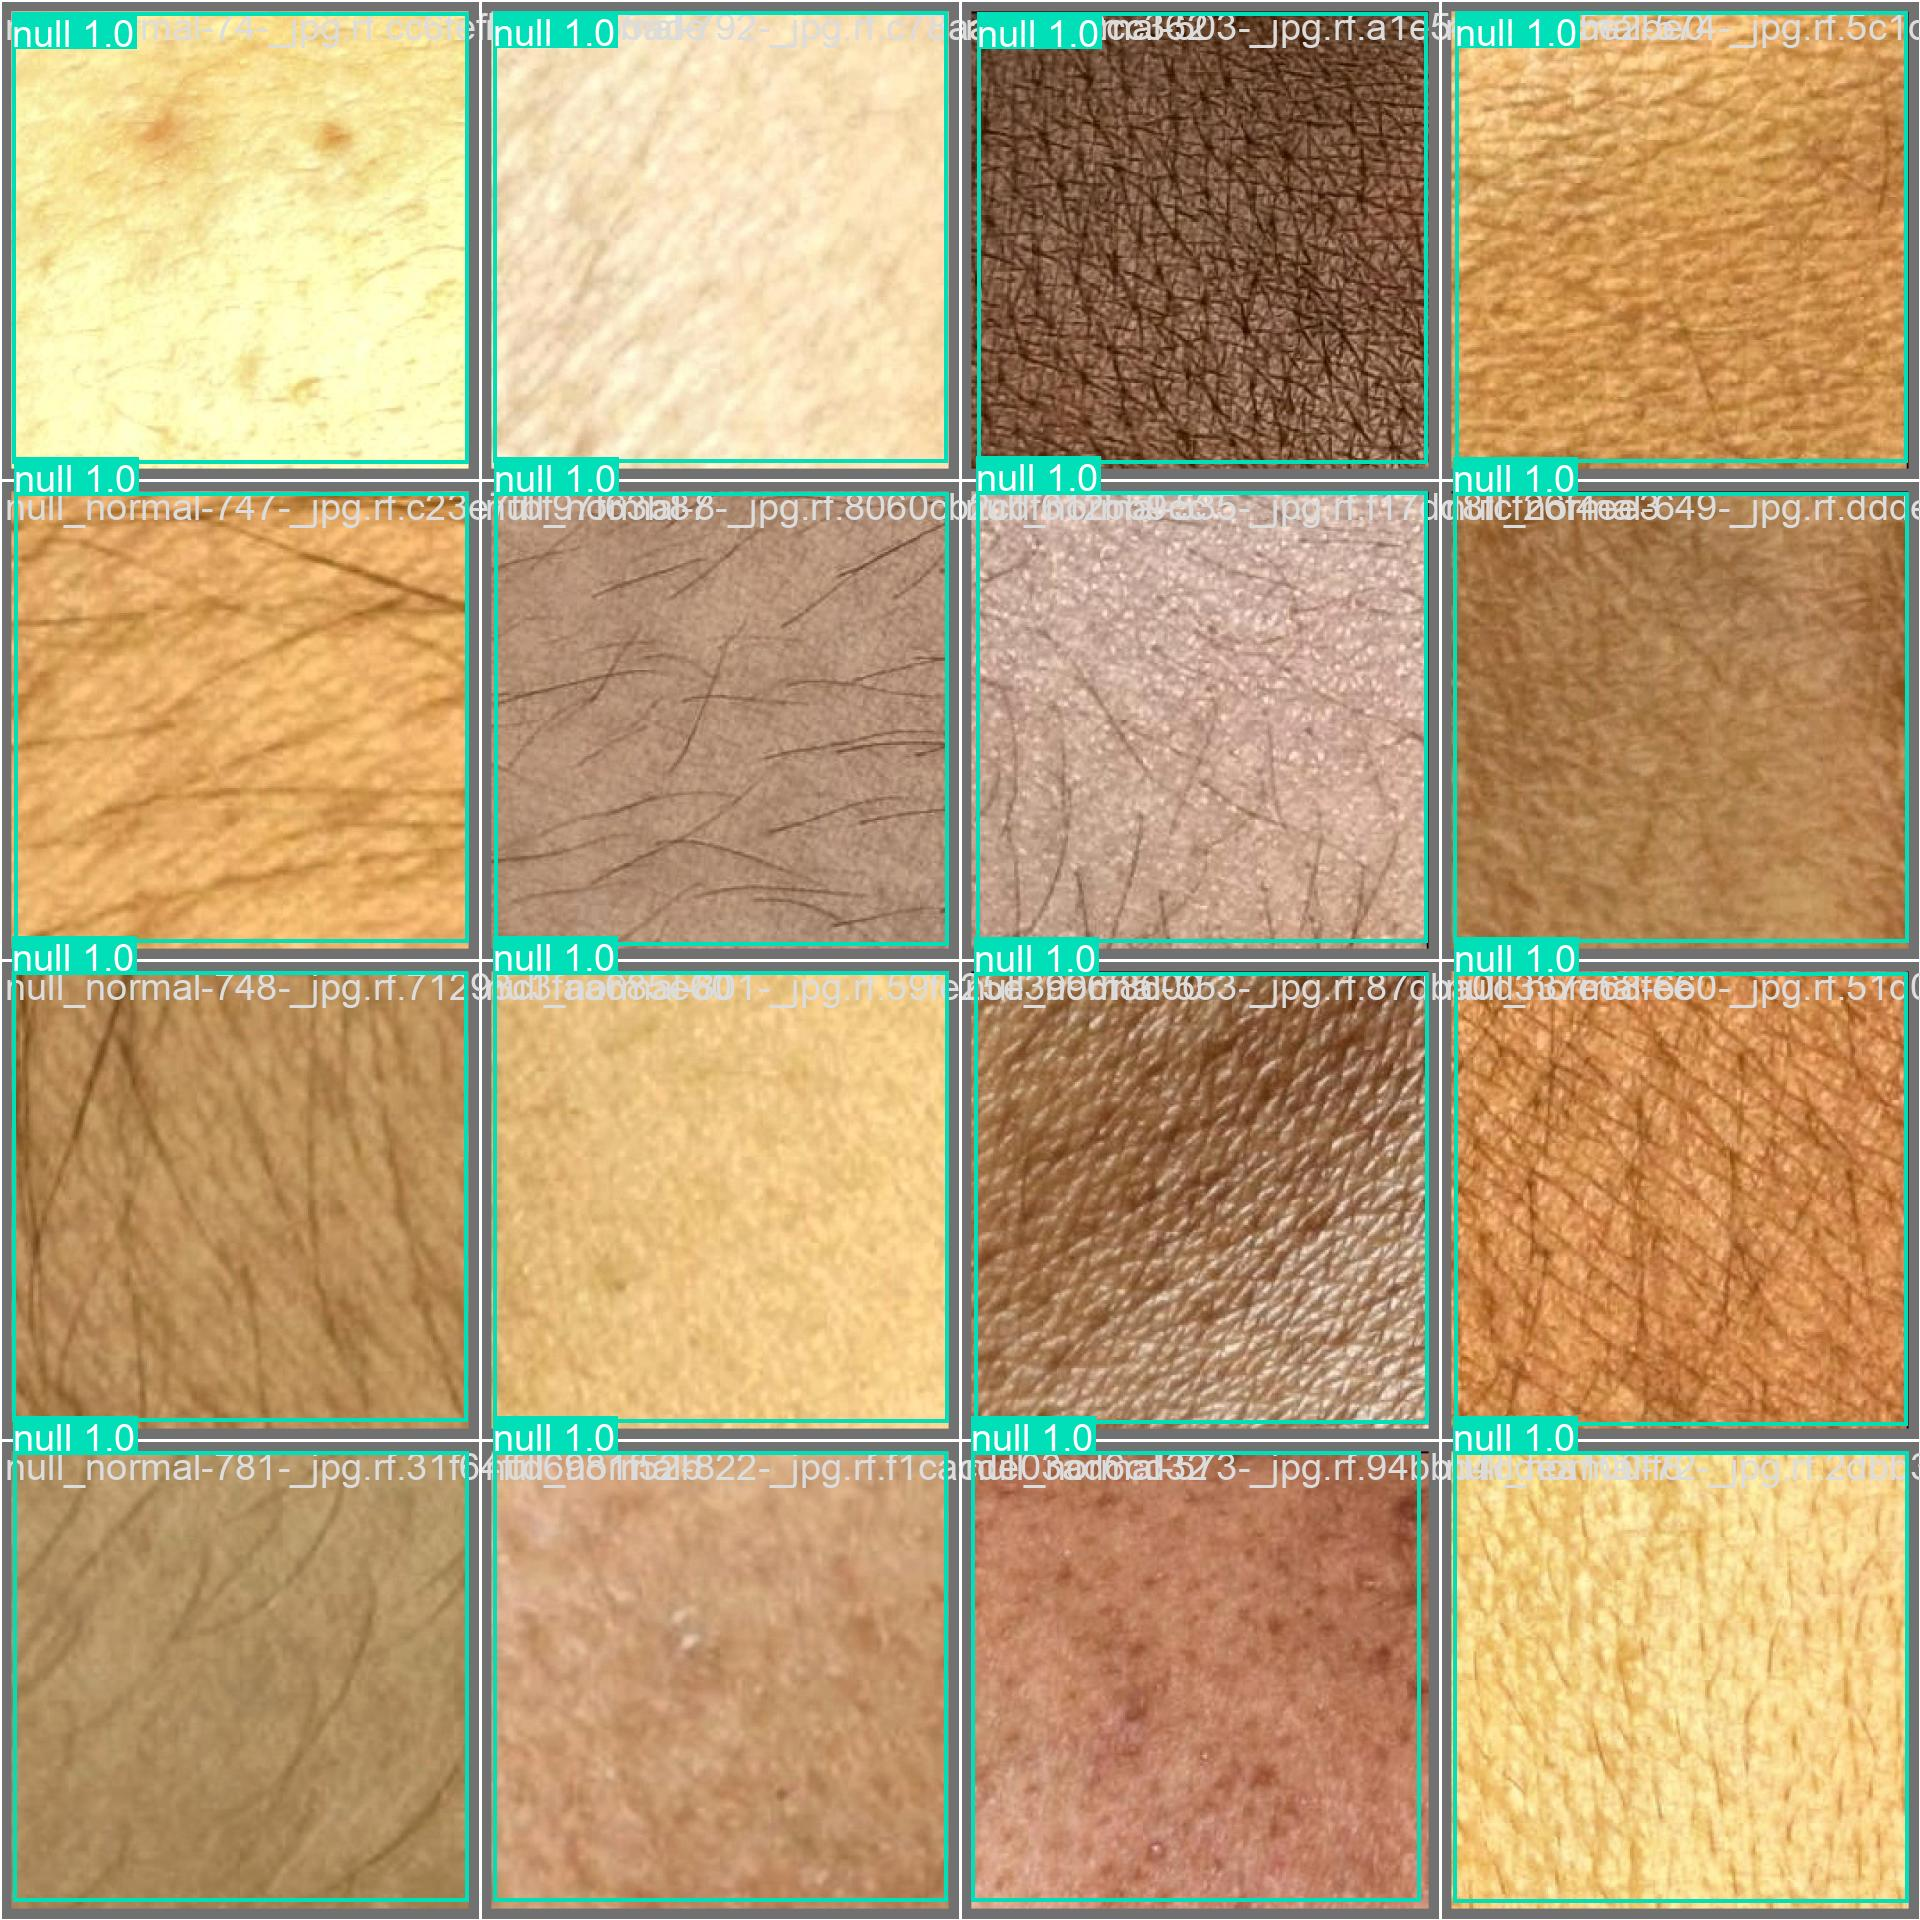

In [14]:
Image("/content/runs/detect/train2/val_batch0_pred.jpg", width=600)

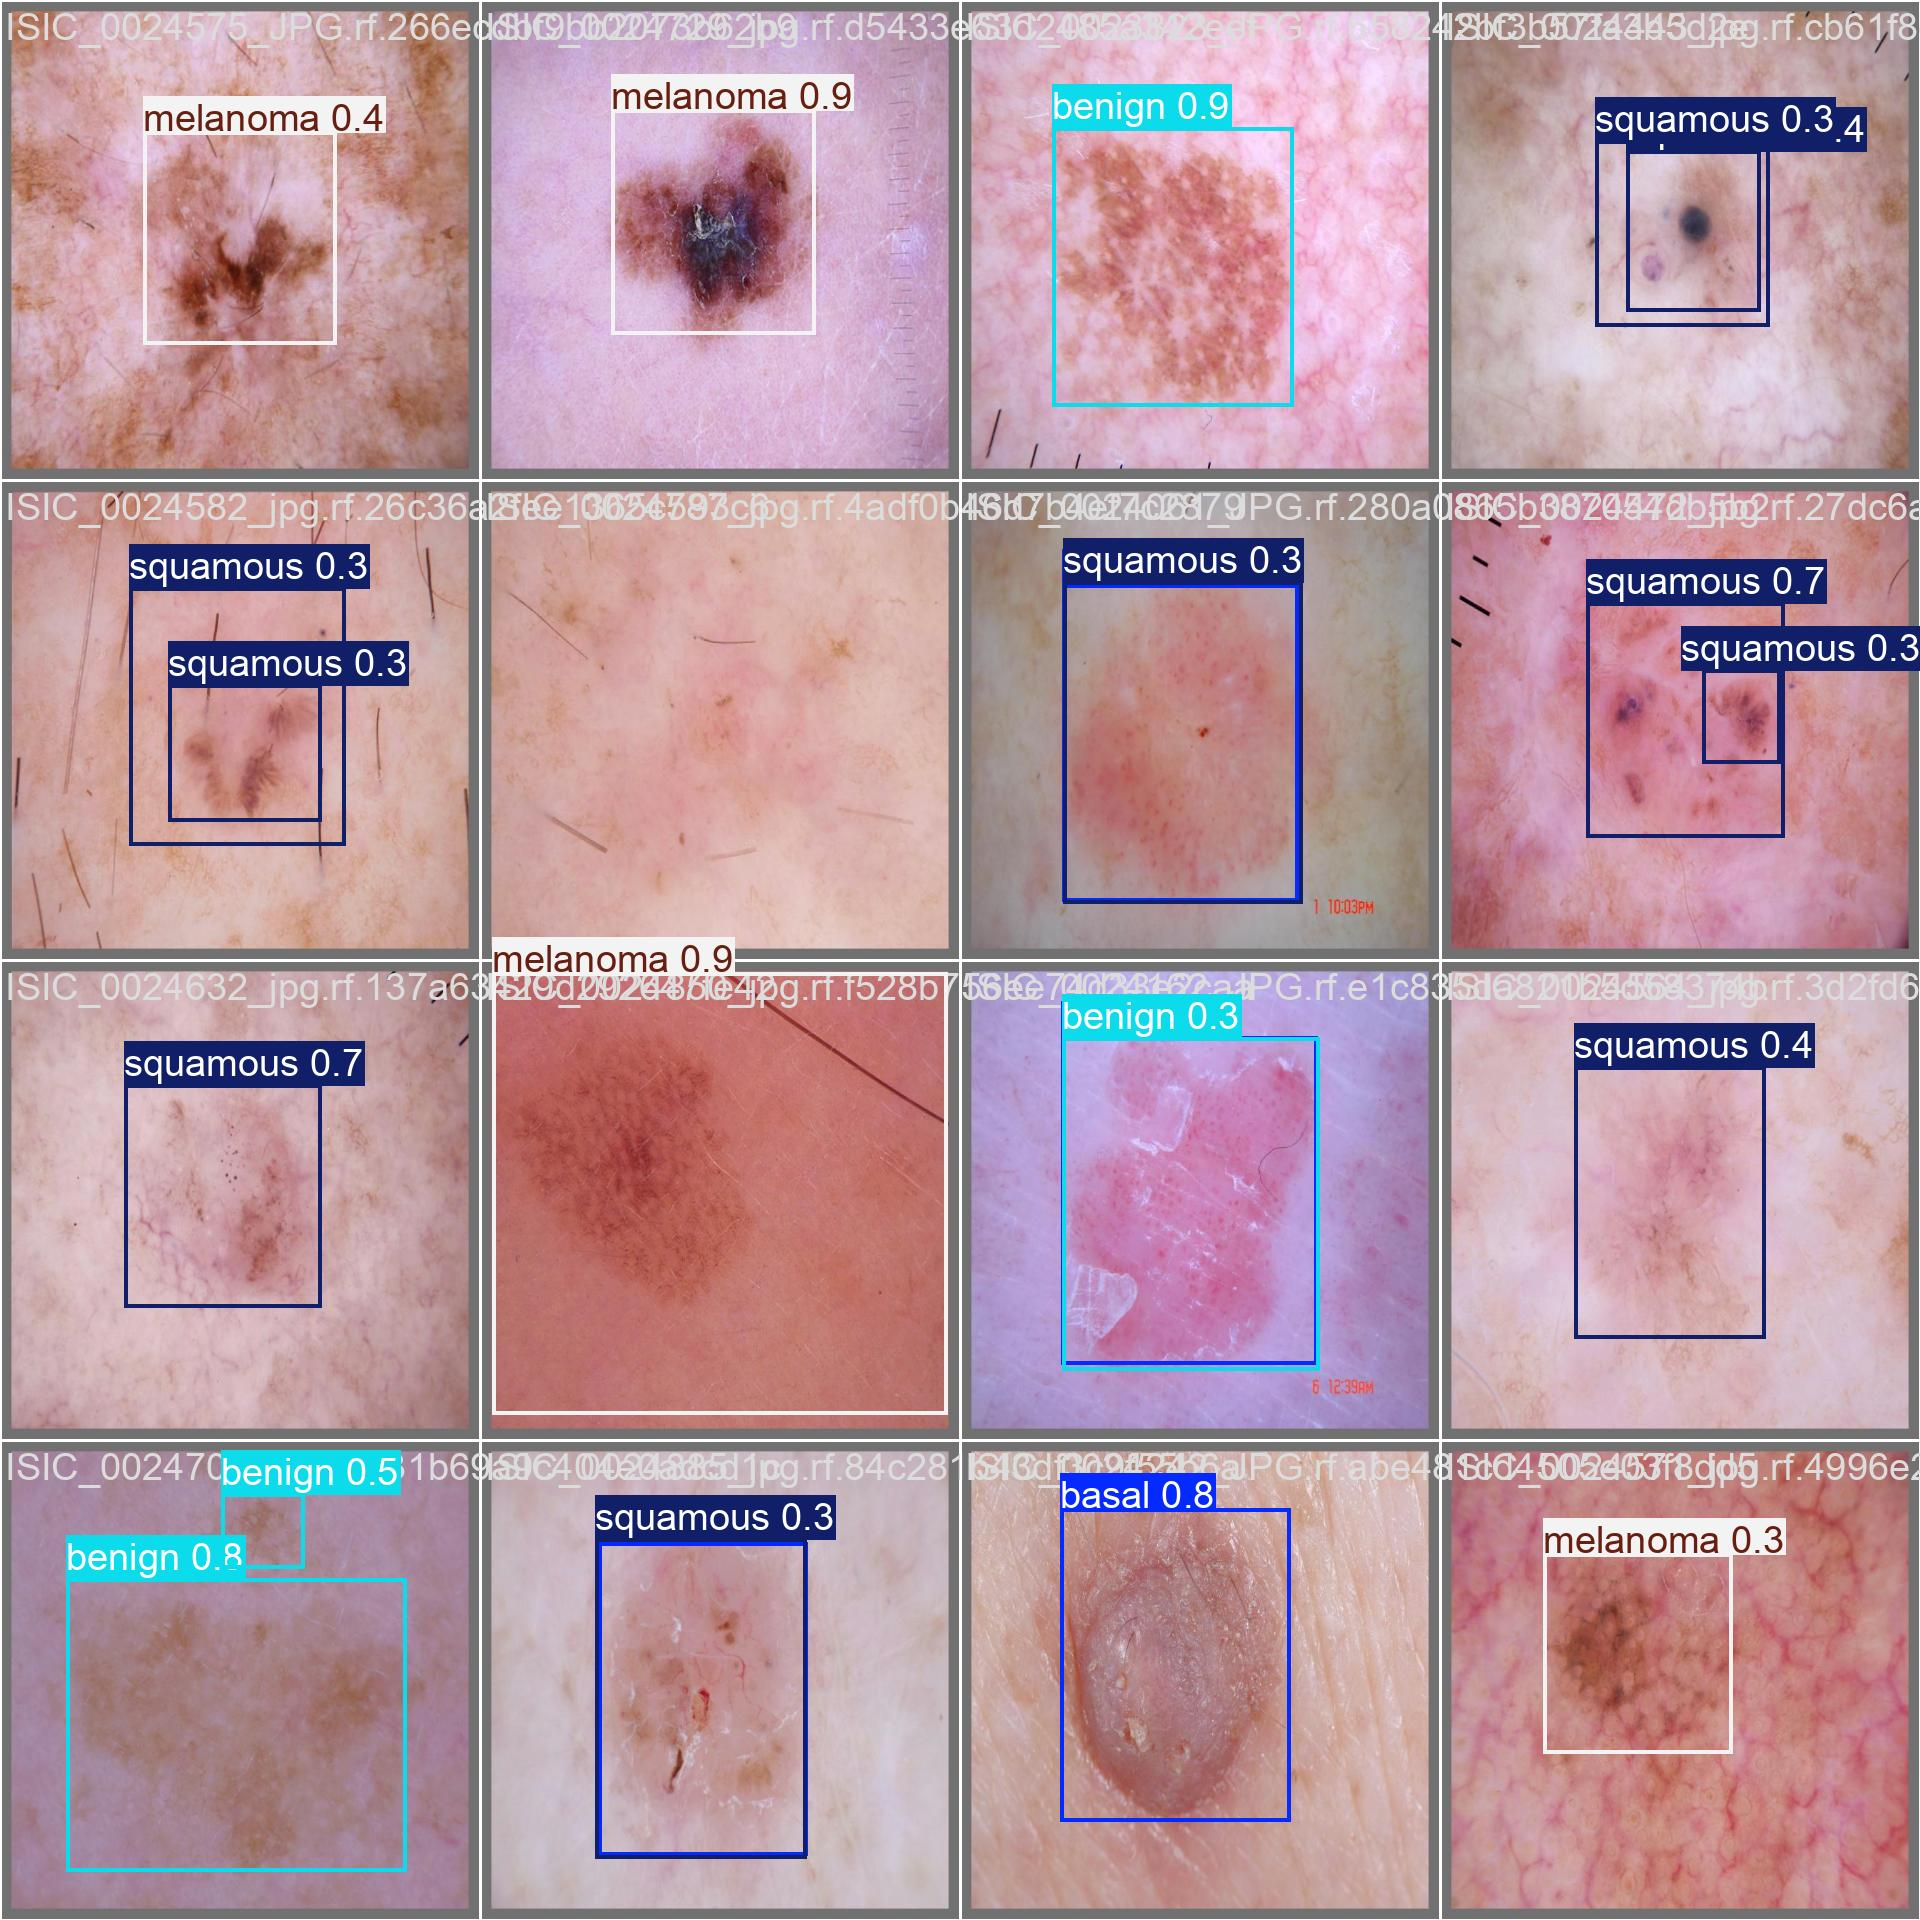

In [15]:
Image("/content/runs/detect/train2/val_batch1_pred.jpg", width=600)

In [17]:
!yolo task=detect mode=val model="/content/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,703 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 905.0±436.4 MB/s, size: 35.8 KB)
val: Scanning /content/Skin-Cancer-1/valid/labels.cache... 329 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 329/329 3.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 4.8it/s 4.4s
                   all        329        337      0.715      0.791      0.786      0.583
                 basal         76         77      0.726      0.779      0.832      0.397
                benign         46         49      0.498      0.612      0.538      0.405
              melanoma        112        114      0.771      0.887      0.911      0.789
                  null         49         49      0.985          1      0.995      0.995
              squamous         46        

In [19]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12n summary (fused): 159 layers, 2,557,703 parameters, 0 gradients, 6.3 GFLOPs

image 1/134 /content/Skin-Cancer-1/test/images/ISIC_0013299_JPG.rf.eea58abc95145e71f59253dd408a757b.jpg: 640x640 1 basal, 16.8ms
image 2/134 /content/Skin-Cancer-1/test/images/ISIC_0013622_JPG.rf.3d7995c103037d053c376f3b26e3e18e.jpg: 640x640 1 basal, 12.3ms
image 3/134 /content/Skin-Cancer-1/test/images/ISIC_0013949_JPG.rf.3ca0c2a8b515aa0b56fa97eae42e0f4b.jpg: 640x640 1 basal, 12.3ms
image 4/134 /content/Skin-Cancer-1/test/images/ISIC_0014373_JPG.rf.211c3209c150f081446ca64705d7a6b9.jpg: 640x640 1 basal, 12.0ms
image 5/134 /content/Skin-Cancer-1/test/images/ISIC_0021575_JPG.rf.78fdee733e8873181ac279845c64b3fe.jpg: 640x640 1 basal, 1 benign, 12.2ms
image 6/134 /content/Skin-Cancer-1/test/images/ISIC_0022202_JPG.rf.668f8503f8cc9f038a6f9905b2373676.jpg: 640x640 1 benign, 11.8ms
image 7/134 /content/Skin-Cancer-1/test/images/

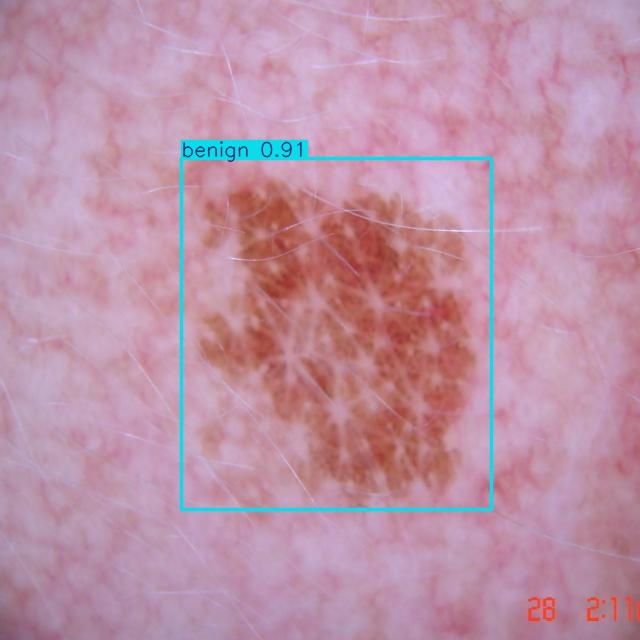

In [22]:
Image("/content/runs/detect/predict/ISIC_0023825_JPG.rf.dcf0cc022be795dd658fbacf72d71b7e.jpg", width=600)